<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
print(df.columns)
print(df.dtypes)
print(df.info)
print(df.describe())

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Check missing values count
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Value counts for key columns
print("\nEmployment Value Counts:\n", df['Employment'].value_counts(dropna=False))
print("\nJobSat Value Counts:\n", df['JobSat'].value_counts(dropna=False))
print("\nYearsCodePro Value Counts:\n", df['YearsCodePro'].value_counts(dropna=False))


# Drop rows missing critical info
df_clean = df.dropna(subset=['Employment', 'JobSat', 'YearsCodePro'])
print(df_clean[['Employment', 'JobSat', 'YearsCodePro']].isnull().sum())

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Employment Value Counts:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                 

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



Employment Value Counts:
Employment
Employed, full-time                                     25475
Independent contractor, freelancer, or self-employed     4196
Employed, part-time                                      1782
Student, full-time                                        991
Student, part-time                                        915
Not employed, but looking for work                        133
Retired                                                    22
Not employed, and not looking for work                     19
Name: count, dtype: int64


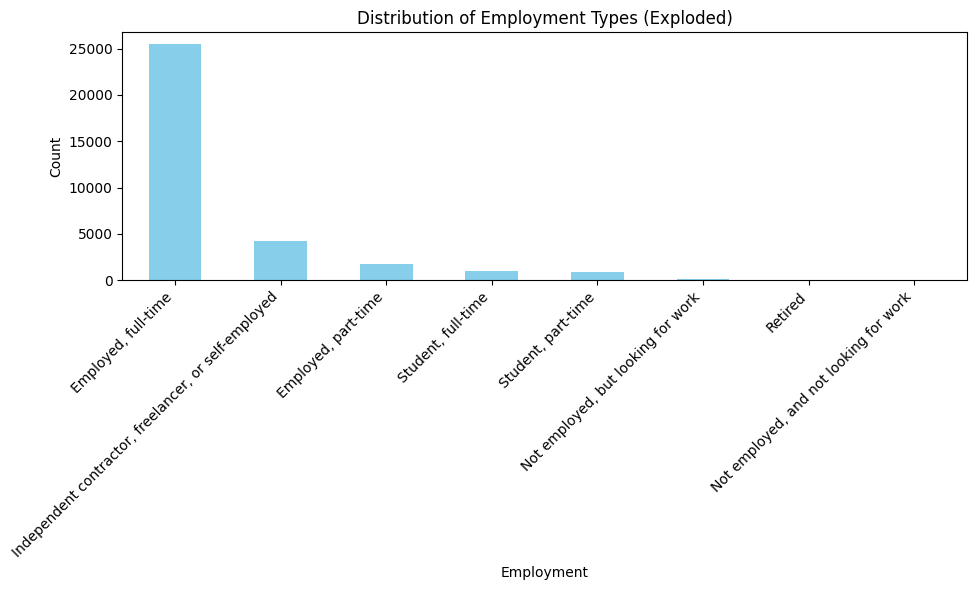


JobSat Value Counts:
JobSat
0.0      332
1.0      314
2.0      889
3.0     1362
4.0     1328
5.0     2212
6.0     4343
7.0     7283
8.0     8596
9.0     4176
10.0    2698
Name: count, dtype: int64


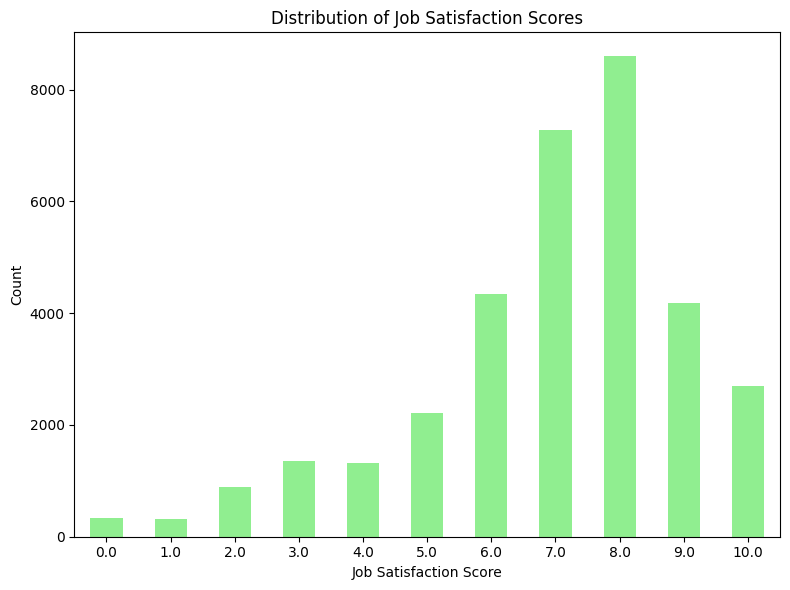


YearsCodePro Value Counts:
YearsCodePro
0.5     1067
1.0     1553
2.0     2726
3.0     2794
4.0     2265
5.0     2425
6.0     2019
7.0     1781
8.0     1822
9.0     1115
10.0    2186
11.0     906
12.0    1264
13.0     792
14.0     725
15.0    1064
16.0     651
17.0     533
18.0     596
19.0     359
20.0     937
21.0     264
22.0     313
23.0     289
24.0     395
25.0     570
26.0     263
27.0     235
28.0     197
29.0     118
30.0     373
31.0      67
32.0     114
33.0      79
34.0      76
35.0     135
36.0      70
37.0      49
38.0      60
39.0      31
40.0      99
41.0      25
42.0      27
43.0      16
44.0      14
45.0      37
46.0       7
47.0       2
48.0       4
49.0       4
50.0       2
51.0      18
Name: count, dtype: int64


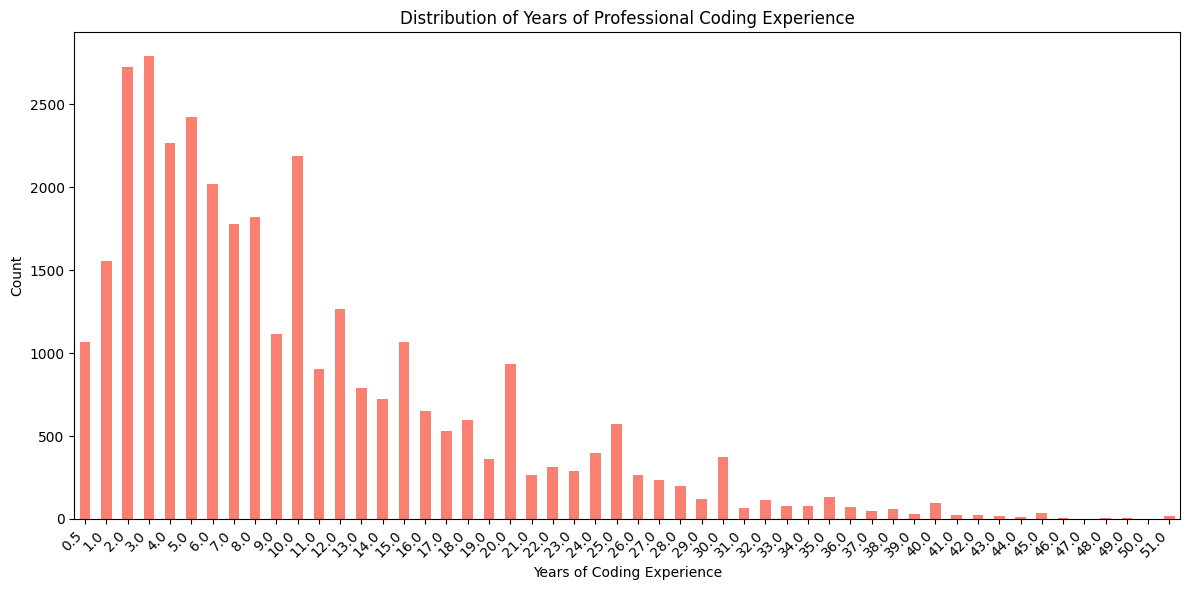

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a fresh copy and clean Employment data
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['Employment', 'JobSat', 'YearsCodePro'])

# --- Fix Employment column: explode by semicolons ---
df_clean['Employment'] = df_clean['Employment'].str.split(';')
df_exploded = df_clean.explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

# 1. Employment Distribution (Cleaned)
employment_counts = df_exploded['Employment'].value_counts(dropna=False)
print("Employment Value Counts:")
print(employment_counts)

plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employment Types (Exploded)')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. JobSat (Job Satisfaction)
if 'JobSat' in df_exploded.columns:
    jobsat_counts = df_exploded['JobSat'].value_counts(dropna=False).sort_index()
    print("\nJobSat Value Counts:")
    print(jobsat_counts)

    plt.figure(figsize=(8, 6))
    jobsat_counts.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Job Satisfaction Scores')
    plt.xlabel('Job Satisfaction Score')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 3. YearsCodePro: Convert to numeric and plot
if 'YearsCodePro' in df_exploded.columns:
    df_exploded['YearsCodePro'] = df_exploded['YearsCodePro'].replace({
        'Less than 1 year': 0.5,
        'More than 50 years': 51
    }).astype(float)

    years_code_counts = df_exploded['YearsCodePro'].value_counts(dropna=False).sort_index()
    print("\nYearsCodePro Value Counts:")
    print(years_code_counts)

    plt.figure(figsize=(12, 6))
    years_code_counts.plot(kind='bar', color='salmon')
    plt.title('Distribution of Years of Professional Coding Experience')
    plt.xlabel('Years of Coding Experience')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


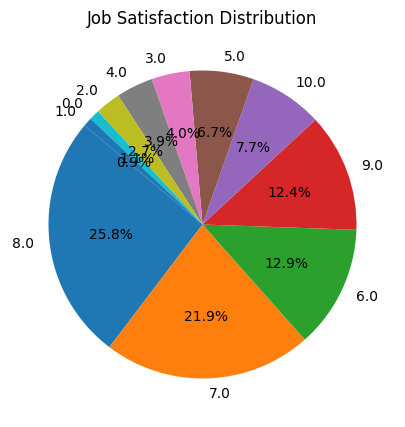

/tmp/ipykernel_1663/3741048724.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['JobSat'], shade=True)


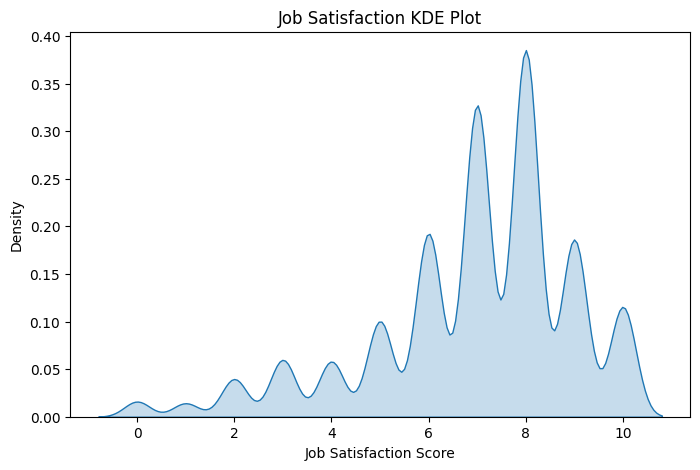

In [6]:
## Write your code here
plt.figure(figsize=(8,5))

# Pie chart
job_counts = df_clean['JobSat'].value_counts()
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Satisfaction Distribution')
plt.show()

# Or KDE plot if JobSat is numeric
plt.figure(figsize=(8,5))
sns.kdeplot(df_clean['JobSat'], shade=True)
plt.title('Job Satisfaction KDE Plot')
plt.xlabel('Job Satisfaction Score')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


Languages worked with: 49
Languages want to work with: 49
Overlap: 49


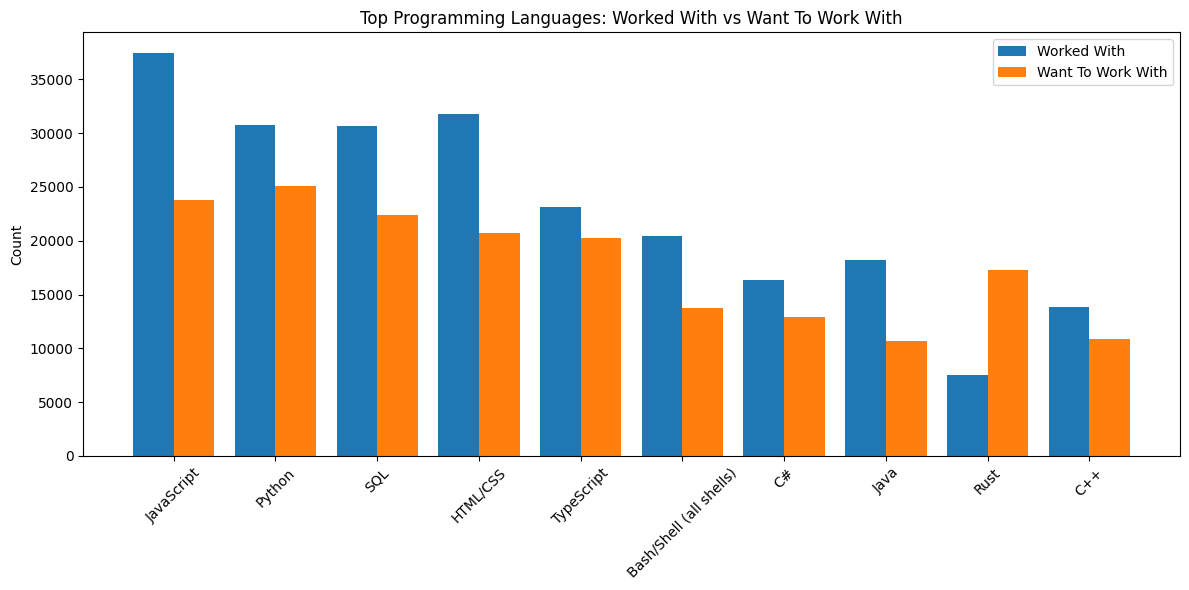

In [7]:
## Write your code here
# Split language columns into sets
worked_with = set(';'.join(df_clean['LanguageHaveWorkedWith'].dropna()).split(';'))
want_to_work_with = set(';'.join(df_clean['LanguageWantToWorkWith'].dropna()).split(';'))

print(f"Languages worked with: {len(worked_with)}")
print(f"Languages want to work with: {len(want_to_work_with)}")
print(f"Overlap: {len(worked_with & want_to_work_with)}")

# Grouped bar chart for top languages
from collections import Counter

worked_counter = Counter(';'.join(df_clean['LanguageHaveWorkedWith'].dropna()).split(';'))
want_counter = Counter(';'.join(df_clean['LanguageWantToWorkWith'].dropna()).split(';'))

# Top 10 combined
top_langs = list((worked_counter + want_counter).most_common(10))
top_langs_names = [x[0] for x in top_langs]

worked_vals = [worked_counter.get(lang,0) for lang in top_langs_names]
want_vals = [want_counter.get(lang,0) for lang in top_langs_names]

import numpy as np
x = np.arange(len(top_langs_names))

plt.figure(figsize=(12,6))
plt.bar(x - 0.2, worked_vals, width=0.4, label='Worked With')
plt.bar(x + 0.2, want_vals, width=0.4, label='Want To Work With')
plt.xticks(x, top_langs_names, rotation=45)
plt.ylabel('Count')
plt.title('Top Programming Languages: Worked With vs Want To Work With')
plt.legend()
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


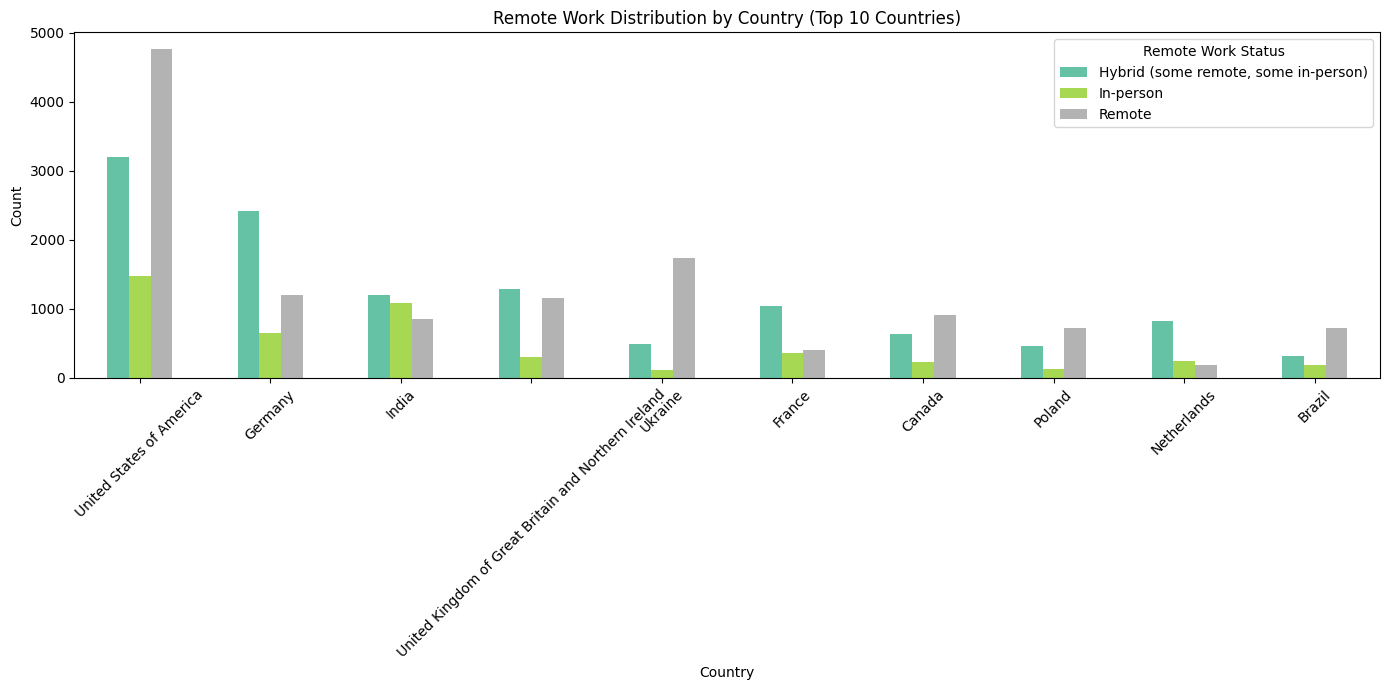

In [8]:
## Write your code here
# Filter relevant columns and drop missing
remote_region = df_clean.dropna(subset=['RemoteWork', 'Country'])

# Count by country and remote work status
remote_counts = remote_region.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Plot grouped bar chart for top 10 countries by respondent count
top_countries = remote_region['Country'].value_counts().head(10).index
remote_counts_top = remote_counts.loc[top_countries]

remote_counts_top.plot(kind='bar', stacked=False, figsize=(14,7), colormap='Set2')
plt.title('Remote Work Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson correlation (pandas): 0.104


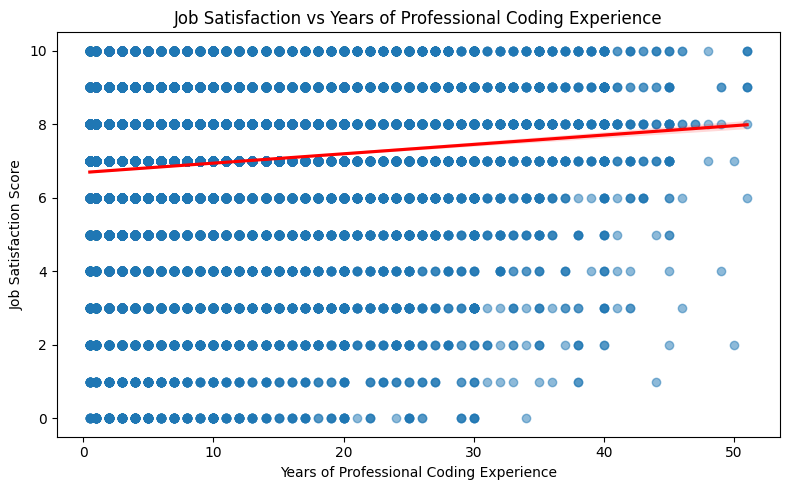

In [9]:
## Write your code here
# Convert YearsCodePro to numeric if needed
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}).astype(float)

# Drop missing values in relevant columns
df_corr = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Calculate correlation with pandas
correlation = df_corr['YearsCodePro'].corr(df_corr['JobSat'])
print(f"Pearson correlation (pandas): {correlation:.3f}")

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x='YearsCodePro', y='JobSat', data=df_corr, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Job Satisfaction vs Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_1663/4070870922.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


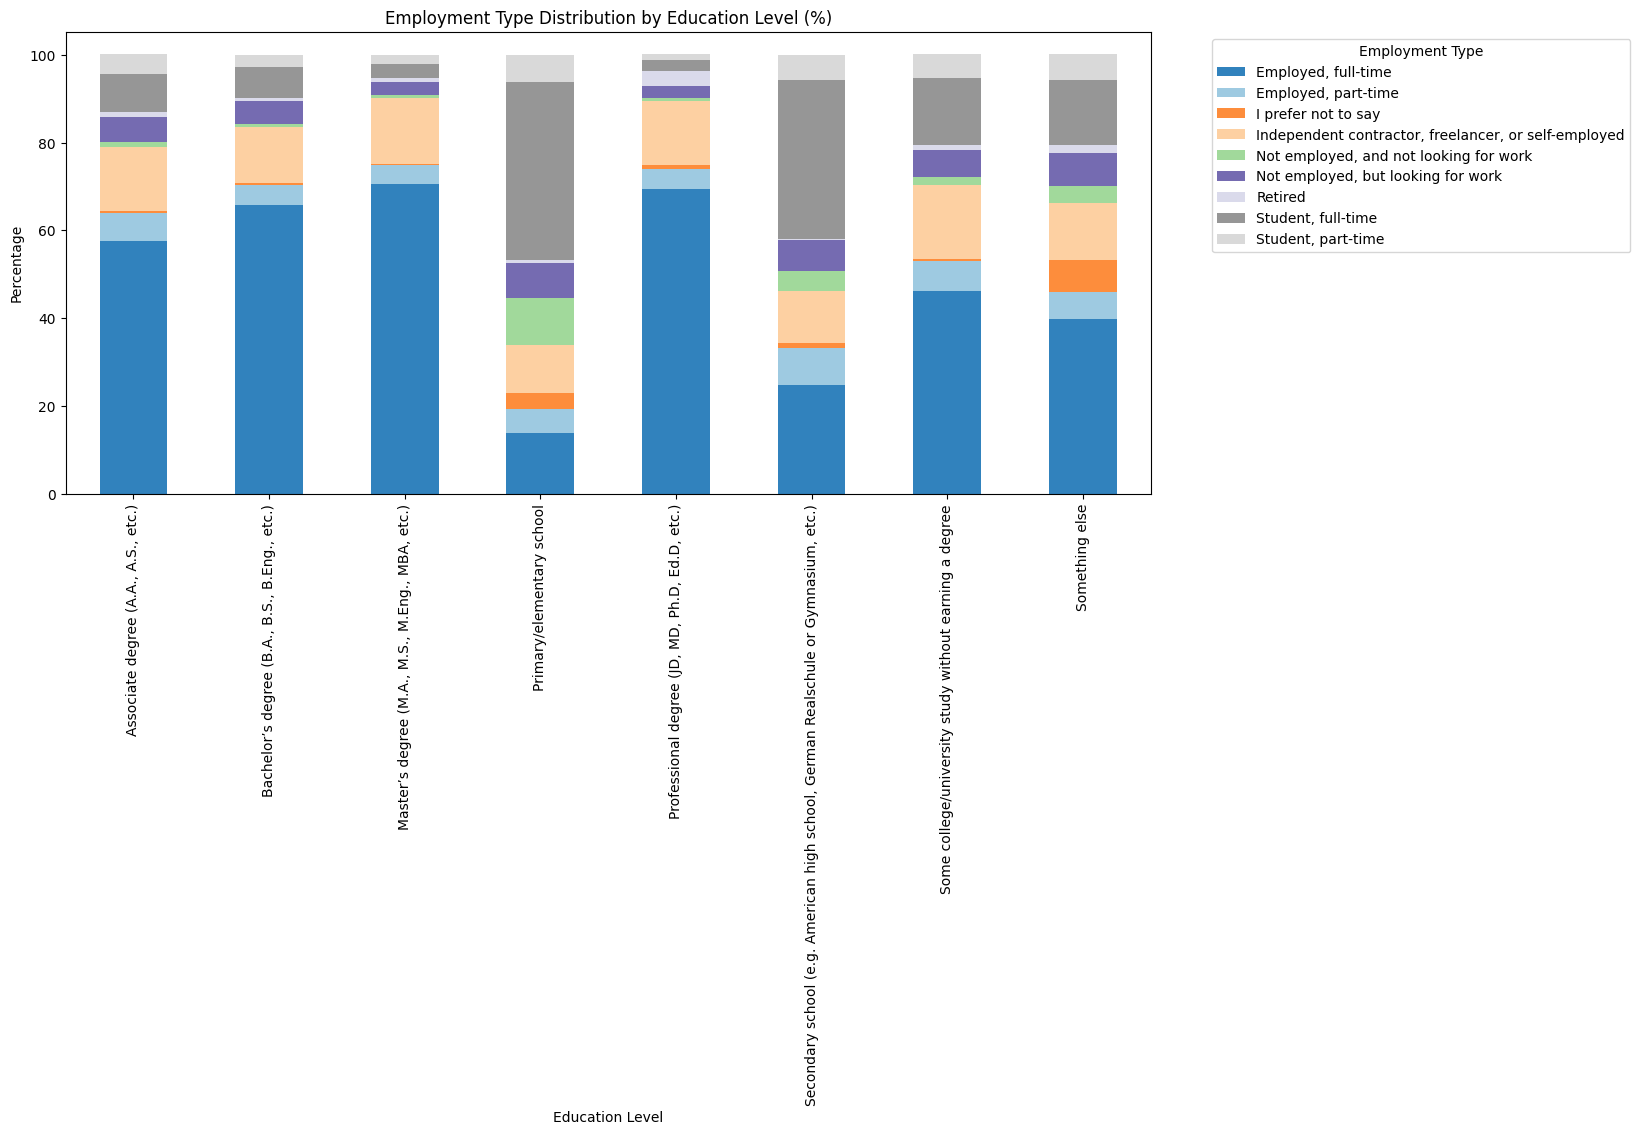

In [12]:
## Write your code here
# Step 1: Drop missing values
df_clean = df.dropna(subset=['Employment', 'EdLevel']).copy()

# Step 2: Split semicolon-separated Employment types and explode into rows
df_clean['Employment'] = df_clean['Employment'].str.split(';')
df_exp = df_clean.explode('Employment')
df_exp['Employment'] = df_exp['Employment'].str.strip()

# Step 3: Create a normalized crosstab (percentages within each education level)
edu_employment_ct = pd.crosstab(
    df_exp['EdLevel'],
    df_exp['Employment'],
    normalize='index'
) * 100

# Optional: round for cleaner legend
edu_employment_ct = edu_employment_ct.round(1)

# Step 4: Plot the stacked bar chart
edu_employment_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20c'
)

plt.title('Employment Type Distribution by Education Level (%)')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df_clean.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
